**Brian Blaylock**  
*July 20, 2021*

# RAP Data

There are different products available on the cloud.

In [1]:
from herbie.archive import Herbie
from toolbox.cartopy_tools import common_features, pc
from paint.standard2 import cm_tmp
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [3]:
H = Herbie('2021-11-19', 
           model='rap', 
           product='awp130pgrb')

🏋🏻‍♂️ Found 2021-Nov-19 00:00 UTC F00 [RAP] [product=awp130pgrb] GRIB2 file from aws and index file from aws.                                                                                                                                                       


In [4]:
x = H.xarray('TMP:2 m above')

👨🏻‍🏭 Created directory: [/p/cwfs/blaylock/data/rap/20211119]
📇 Download subset: [RAP] model [awp130pgrb] product run at 2021-Nov-19 00:00 UTC F00                                                            
 cURL from https://noaa-rap-pds.s3.amazonaws.com/rap.20211119/rap.t00z.awp130pgrbf00.grib2
   1: GRIB_message=203 TMP:2 m above ground:anl


/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


Text(0.0, 1.0, 'RAP: CONUS Pressure levels; 13-km resolution')

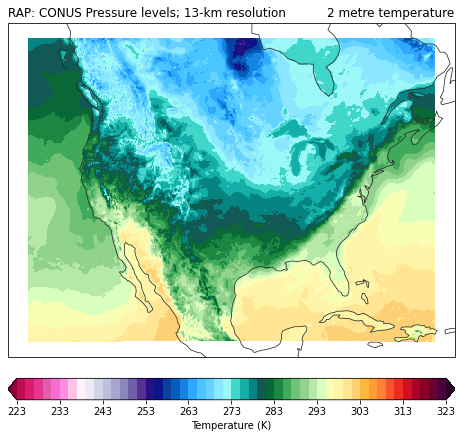

In [5]:
ax = common_features(crs=x.herbie.crs, figsize=[8,8]).ax
p = ax.pcolormesh(x.longitude, x.latitude, x.t2m, 
              transform=pc, 
              **cm_tmp(units='K').cmap_kwargs)
plt.colorbar(p, ax=ax, 
             orientation='horizontal', pad=.05,
             **cm_tmp(units='K').cbar_kwargs)

ax.set_title(x.t2m.GRIB_name, loc='right')
ax.set_title(f"{x.model.upper()}: {H.product_description}", loc='left')

# RAP record on NCEI

In [9]:
H = Herbie('2019-11-23', 
           model='rap_historical', 
           product='analysis')

🏋🏻‍♂️ Found 2019-Nov-23 00:00 UTC F00 [RAP_HISTORICAL] [product=analysis] GRIB2 file from rap_130 and index file from rap_130.                                                                                                                                                       


In [11]:
x = H.xarray('TMP:2 m above')

👨🏻‍🏭 Created directory: [/p/cwfs/blaylock/data/rap_historical/20191123]
📇 Download subset: [RAP_HISTORICAL] model [analysis] product run at 2019-Nov-23 00:00 UTC F00                                                            
 cURL from https://www.ncei.noaa.gov/data/rapid-refresh/access/historical/analysis/201911/20191123/rap_130_20191123_0000_000.grb2
   1: GRIB_message=203 TMP:2 m above ground:anl


/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


Text(0.0, 1.0, 'RAP_HISTORICAL: January 2005 through May 2020')

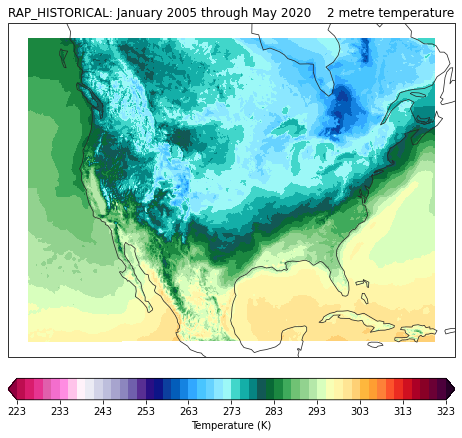

In [12]:
ax = common_features(crs=x.herbie.crs, figsize=[8,8]).ax
p = ax.pcolormesh(x.longitude, x.latitude, x.t2m, 
              transform=pc, 
              **cm_tmp(units='K').cmap_kwargs)
plt.colorbar(p, ax=ax, 
             orientation='horizontal', pad=.05,
             **cm_tmp(units='K').cbar_kwargs)

ax.set_title(x.t2m.GRIB_name, loc='right')
ax.set_title(f"{x.model.upper()}: {H.product_description}", loc='left')

In [15]:
H._check_grib(H.grib)

True

In [16]:
H.grib

'https://www.ncei.noaa.gov/data/rapid-refresh/access/historical/analysis/201911/20191123/rap_130_20191123_0000_000.grb2'

In [19]:
H = Herbie('2019-11-19', model='rap_historical', product='analysis')
assert H.grib is not None

⚠ Herbie didn't find any inventory files that exists from ['.inv', '.grb2.inv', 'grb.inv']
⚠ Herbie didn't find any inventory files that exists from ['.inv', '.grb2.inv', 'grb.inv']
⚠ Herbie didn't find any inventory files that exists from ['.inv', '.grb2.inv', 'grb.inv']
⚠ Herbie didn't find any inventory files that exists from ['.inv', '.grb2.inv', 'grb.inv']
⚠ Herbie didn't find any inventory files that exists from ['.inv', '.grb2.inv', 'grb.inv']
💔 Did not find a GRIB2 or Index File for 2019-Nov-19 00:00 UTC F00 RAP_HISTORICAL                                                                                                     


AssertionError: 

In [21]:
H = Herbie('2005-01-01', model='rap_historical', product='analysis')
assert H.grib is not None

⚠ Herbie didn't find any inventory files that exists from ['.inv', '.grb2.inv', 'grb.inv']
⚠ Herbie didn't find any inventory files that exists from ['.inv', '.grb2.inv', 'grb.inv']
🏋🏻‍♂️ Found 2005-Jan-01 00:00 UTC F00 [RAP_HISTORICAL] [product=analysis] GRIB2 file from ruc_252 and index file from ruc_252.                                                                                                                                                       


In [26]:
H = Herbie('2020-03-15', model='rap_ncei', product="rap-130-13km")
H.SOURCES

🏋🏻‍♂️ Found 2020-Mar-15 00:00 UTC F00 [RAP_NCEI] [product=rap-130-13km] GRIB2 file from ncei_13km_analysis and index file from ncei_13km_analysis.                                                                                                                                                       


{'ncei_13km_analysis': 'https://www.ncei.noaa.gov/data/rapid-refresh/access/rap-130-13km/analysis/202003/20200315/rap_130_20200315_0000_000.grb2',
 'ncei_13km_forecast': 'https://www.ncei.noaa.gov/data/rapid-refresh/access/rap-130-13km/forecast/202003/20200315/rap_130_20200315_0000_000.grb2',
 'ncei_20km_analysis': 'https://www.ncei.noaa.gov/data/rapid-refresh/access/rap-130-13km/analysis/202003/20200315/rap_252_20200315_0000_000.grb2',
 'ncei_20km_forecast': 'https://www.ncei.noaa.gov/data/rapid-refresh/access/rap-130-13km/forecast/202003/20200315/rap_252_20200315_0000_000.grb2'}

In [30]:
import pandas as pd
H = Herbie(pd.to_datetime('today').floor('1D'), model="rap")

/p/home/blaylock/BB_python/Herbie/herbie/archive.py:217: UserWarning: `product` not specified. Will use ["awp130pgrb"].
  warnings.warn(f'`product` not specified. Will use ["{self.product}"].')


🏋🏻‍♂️ Found 2021-Dec-01 00:00 UTC F00 [RAP] [product=awp130pgrb] GRIB2 file from aws and index file from aws.                                                                                                                                                       


In [29]:
pd.to_datetime('today').floor('1D')

Timestamp('2021-12-01 00:00:00')

In [31]:
from datetime import datetime

now = datetime.now()
today = datetime(now.year, now.month, now.day)
today_str = today.strftime("%Y-%m-%d %H:%M")

In [32]:
H = Herbie(today_str, model="rap")

/p/home/blaylock/BB_python/Herbie/herbie/archive.py:217: UserWarning: `product` not specified. Will use ["awp130pgrb"].
  warnings.warn(f'`product` not specified. Will use ["{self.product}"].')


🏋🏻‍♂️ Found 2021-Dec-01 00:00 UTC F00 [RAP] [product=awp130pgrb] GRIB2 file from aws and index file from aws.                                                                                                                                                       


In [33]:
H.download()

👨🏻‍🏭 Created directory: [/p/cwfs/blaylock/data/rap/20211201]
✅ Success! Downloaded RAP from aws                 
	src: https://noaa-rap-pds.s3.amazonaws.com/rap.20211201/rap.t00z.awp130pgrbf00.grib2
	dst: /p/cwfs/blaylock/data/rap/20211201/rap.t00z.awp130pgrbf00.grib2


In [34]:
H.xarray("TMP:2 m")

📇 Download subset: [RAP] model [awp130pgrb] product run at 2021-Dec-01 00:00 UTC F00                                                            
 cURL from https://noaa-rap-pds.s3.amazonaws.com/rap.20211201/rap.t00z.awp130pgrbf00.grib2
   1: GRIB_message=203 TMP:2 m above ground:anl


<xarray.Dataset>
Dimensions:              (y: 337, x: 451)
Coordinates:
    time                 datetime64[ns] 2021-12-01
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 2.0
    latitude             (y, x) float64 16.28 16.31 16.34 ... 55.54 55.51 55.48
    longitude            (y, x) float64 233.9 234.0 234.1 ... 302.3 302.4 302.6
    valid_time           datetime64[ns] 2021-12-01
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 298.0 298.0 297.9 ... 273.7 273.6 273.6
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    model:                   rap
    product:                 awp130pgrb
    description:             Rapid Refresh (RAP) from NOMADS and Big Data Pro...
    remote_grib:             https://noaa-rap-pds.s3.amazonaws.com/rap.202112...
    local_grib:              /p/cwfs/blaylock/data/rap/20211201/rap.t00z.awp1...

# List files that are found in Historical NCEI

In [4]:
DATES = pd.date_range('2005-01-01', 'today', freq="AS")
len(DATES), DATES

(17,
 DatetimeIndex(['2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
                '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
                '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01',
                '2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01',
                '2021-01-01'],
               dtype='datetime64[ns]', freq='AS-JAN'))

In [6]:
for D in DATES:
    H = Herbie(D, model="rap_historical", verbose=False, product='analysis')
    print(f"{D:%Y-%m-%d %H:%M} ->FOUND-> {H.grib}")

2005-01-01 00:00 ->FOUND-> https://www.ncei.noaa.gov/data/rapid-refresh/access/historical/analysis/200501/20050101/ruc2_252_20050101_0000_000.grb
2006-01-01 00:00 ->FOUND-> https://www.ncei.noaa.gov/data/rapid-refresh/access/historical/analysis/200601/20060101/ruc2_252_20060101_0000_000.grb
2007-01-01 00:00 ->FOUND-> https://www.ncei.noaa.gov/data/rapid-refresh/access/historical/analysis/200701/20070101/ruc2anl_252_20070101_0000_000.grb
2008-01-01 00:00 ->FOUND-> None
2009-01-01 00:00 ->FOUND-> https://www.ncei.noaa.gov/data/rapid-refresh/access/historical/analysis/200901/20090101/ruc2anl_252_20090101_0000_000.grb
2010-01-01 00:00 ->FOUND-> https://www.ncei.noaa.gov/data/rapid-refresh/access/historical/analysis/201001/20100101/ruc2anl_252_20100101_0000_000.grb
2011-01-01 00:00 ->FOUND-> https://www.ncei.noaa.gov/data/rapid-refresh/access/historical/analysis/201101/20110101/ruc2anl_252_20110101_0000_000.grb
2012-01-01 00:00 ->FOUND-> https://www.ncei.noaa.gov/data/rapid-refresh/access/h

In [12]:
DATES = pd.date_range('2003-01-01', 'today', freq="AS-FEB")
print(len(DATES), DATES)

19 DatetimeIndex(['2003-02-01', '2004-02-01', '2005-02-01', '2006-02-01',
               '2007-02-01', '2008-02-01', '2009-02-01', '2010-02-01',
               '2011-02-01', '2012-02-01', '2013-02-01', '2014-02-01',
               '2015-02-01', '2016-02-01', '2017-02-01', '2018-02-01',
               '2019-02-01', '2020-02-01', '2021-02-01'],
              dtype='datetime64[ns]', freq='AS-FEB')


In [13]:

for D in DATES:
    H = Herbie(D, model="rap_historical", verbose=False, product='forecast')
    print(f"{D:%Y-%m-%d %H:%M} ->FOUND-> {H.grib}")

2003-02-01 00:00 ->FOUND-> https://www.ncei.noaa.gov/data/rapid-refresh/access/historical/forecast/200302/20030201/ruc2_236_20030201_0000_000.grb
2004-02-01 00:00 ->FOUND-> https://www.ncei.noaa.gov/data/rapid-refresh/access/historical/forecast/200402/20040201/ruc2_236_20040201_0000_000.grb
2005-02-01 00:00 ->FOUND-> https://www.ncei.noaa.gov/data/rapid-refresh/access/historical/forecast/200502/20050201/ruc2_236_20050201_0000_000.grb
2006-02-01 00:00 ->FOUND-> None
2007-02-01 00:00 ->FOUND-> None
2008-02-01 00:00 ->FOUND-> None
2009-02-01 00:00 ->FOUND-> None
2010-02-01 00:00 ->FOUND-> https://www.ncei.noaa.gov/data/rapid-refresh/access/historical/forecast/201002/20100201/ruc2_252_20100201_0000_000.grb
2011-02-01 00:00 ->FOUND-> https://www.ncei.noaa.gov/data/rapid-refresh/access/historical/forecast/201102/20110201/ruc2_252_20110201_0000_000.grb
2012-02-01 00:00 ->FOUND-> https://www.ncei.noaa.gov/data/rapid-refresh/access/historical/forecast/201202/20120201/ruc2_252_20120201_0000_000.